# <center>Network Science</center>

## <center>Home Assignment #2: Network models</center>

### <center>Student: *Maxim Ushakov*</center>

#### <hr /> General Information

**Due Date:** 28.02.2016 23:59 <br \>
**Late submission policy:** -0.2 points per day <br \>


Please send your reports to <mailto:network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1

Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are *network growing* and *prefferential attachment*. Implement two restricted B&A-based models:
<br \>

**Model A**
<br \>
Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

**Model B**
<br \>
Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment.
<br \>

1. Generate networks according to the models above ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
4. Is scale-free property conserved in these models?

Analyse results with respect to various parameter settings

### Solution (model A)

1. Generated network is represented on the first figure ($n_0=50, m_0=200, n_{max}=1200, m=4$)
2. PDF/CDF functions are illustrated on the figures 2 and 3 respectively. Distribution characteristics:
$$MEAN\{degree\} = 8.0, VAR\{degree\} = 19.52$$
$MEAN\{degree\}$ is asymptotically equal to $2\cdot m$.
PDF function is seems to be exponentially decreasing, starting from degree equals 4.0 ($=m$).
3. The required dependencies are illustrated on the figures 4, 5 and 6:
    * Average path length increases with number of vertices. However, this growth is decreasing with number of vertices, and the path length is seems to converge to some value.
    * Average clustering coefficient decreases with number of vertices, but it also seems to converge to limit (approximately 0.02).
    * It is obvious from the picture that node degree increases with "age" of vertex (vertex with "age" 5 older than vertex with "age" 10). However, we can see high fluctuation on the picture, so, this dependence is weak.
4. From the last picture we can see that PDF function in log-log scale doesn't seems to be linear, so, node degree of this network doesn't follow power law distribution. As a result, scale-free property didn't conserve in this model. 


mean:  8.0 var:  19.5166666667


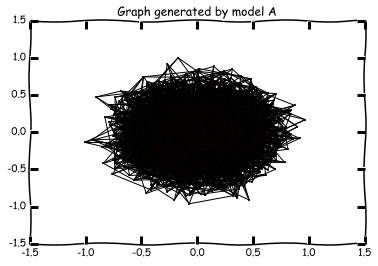

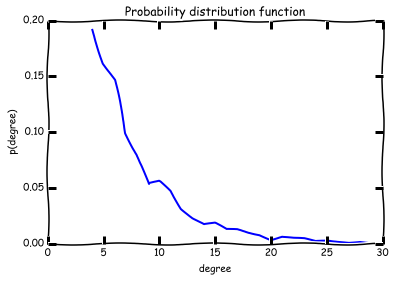

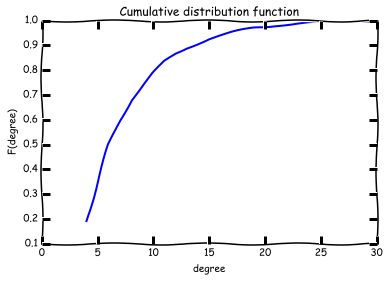

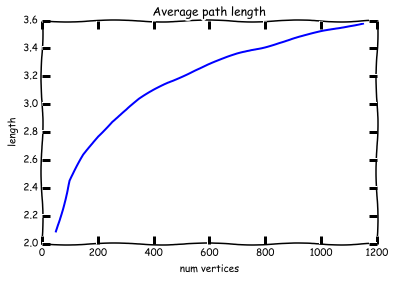

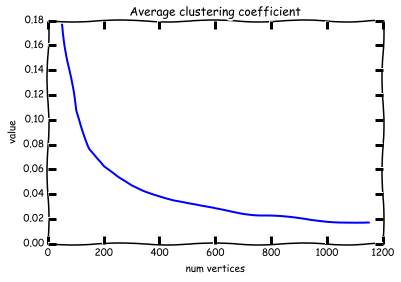

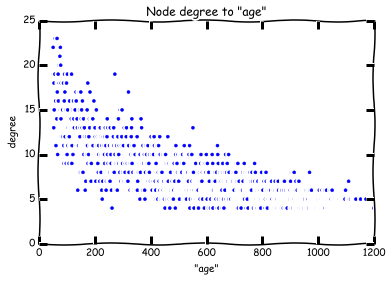

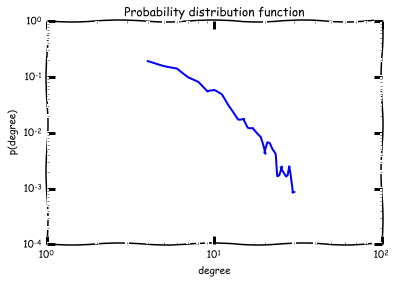

In [32]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import random as rnd
import networkx as nx
%matplotlib inline

#constants
n_0 = 50
m_0 = 200
n_max = 1200
m = 4
h = 50 # step of the graph size for checking out average path length and clustering coefficient

#creating initial random graph
G = nx.gnm_random_graph(n_0, m_0)
#nx.draw_networkx(G,node_size = 1,with_labels = True)
#print(G.nodes())

#adding vertices to the graph according to model A 
#also computing dependencies during graph growth
av_len_list = []
cl_coeff_list = []
for node in xrange(n_0, n_max):
    edges = [(node, neighbour) for neighbour in rnd.sample(xrange(node), m)]
    G.add_edges_from(edges)
    if node % h == 0:
        av_len_list.append(nx.average_shortest_path_length(G))
        cl_coeff_list.append(nx.transitivity(G))

plt.figure(1)
nx.draw_networkx(G,node_size = 1,with_labels = False)
plt.title('Graph generated by model A')

#computing pdf and cdf functions 
#also computing distribution properties
degrees = G.degree().values()

mean_d = float(sum(degrees)) / n_max
var_d = float(sum([i*i for i in degrees])) / n_max - mean_d*mean_d

print 'mean: ', mean_d, 'var: ', var_d

pdf = {}
for d in degrees:
    try:
        pdf[d] += 1.0 / n_max
    except:
        pdf[d] = 1.0 / n_max
        
cdf = {}
temp = 0
for d in pdf.keys():
    temp += pdf[d]
    cdf[d] = temp
        
plt.figure(2)
plt.plot(pdf.keys(), pdf.values())
plt.title('Probability distribution function')
plt.ylabel('p(degree)')
plt.xlabel('degree')

plt.figure(3)
plt.plot(cdf.keys(), cdf.values())
plt.title('Cumulative distribution function')
plt.ylabel('F(degree)')
plt.xlabel('degree')

#plotting required dependencies
degree_to_age = [degrees[i] for i in xrange(n_0, n_max)]

plt.figure(4)
plt.plot(xrange(n_0, n_max, h), av_len_list)
plt.title('Average path length')
plt.ylabel('length')
plt.xlabel('num vertices')

plt.figure(5)
plt.plot(xrange(n_0, n_max, h), cl_coeff_list)
plt.title('Average clustering coefficient')
plt.ylabel('value')
plt.xlabel('num vertices')

plt.figure(6)
plt.plot(xrange(n_0, n_max), degree_to_age, '.')
plt.title('Node degree to "age"')
plt.ylabel('degree')
plt.xlabel('"age"')

#test on scale-free property
plt.figure(7)
plt.loglog(pdf.keys(), pdf.values())
plt.title('Probability distribution function')
plt.ylabel('p(degree)')
plt.xlabel('degree')

### Solution (model B)

1. Generated network is represented on the first figure ($m_0=200, n_{max}=1200, m=4$)
2. PDF/CDF functions are illustrated on the figures 2 and 3 respectively. Distribution characteristics:
$$MEAN\{degree\} = 8.32, VAR\{degree\} = 30.8$$
PDF function is seems to be exponentially decreasing, starting from degree equals 4.0 ($=m$).
3. The required dependencies are illustrated on the figures 4, 5 and 6:
    * Average path length increases with number of vertices. As in the previous case, this growth is seems to be limitted.
    * Average clustering coefficient decreases with number of vertices and converges to some value (near 0.01).
    * In contrast to the previous model, we don't see dependence between "age" of vertex and its degree (by "age" of vertex in model B we define order, in which this vertex is selected). 
4. From the last picture we can see that PDF function in log-log scale is approximately linear, so, indeed, we can assume that scale-free property conserved for this model.

mean:  8.31666666667 var:  30.8080555556


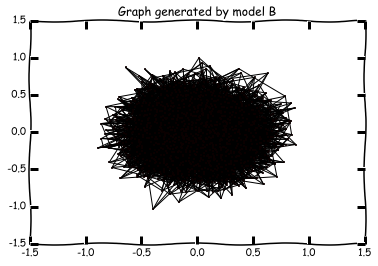

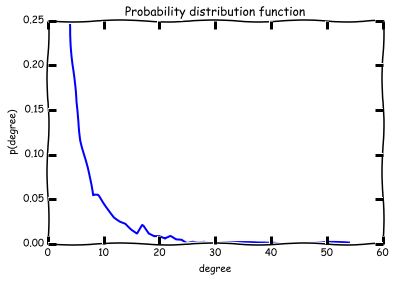

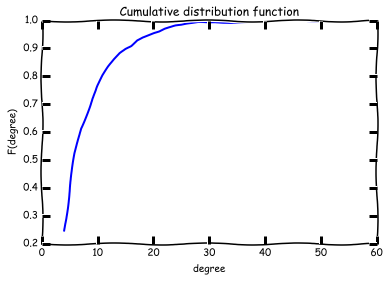

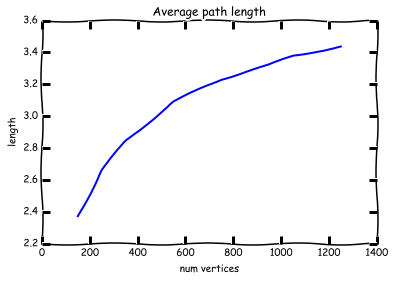

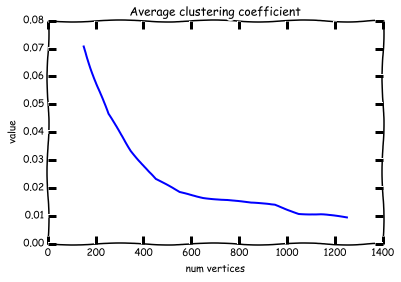

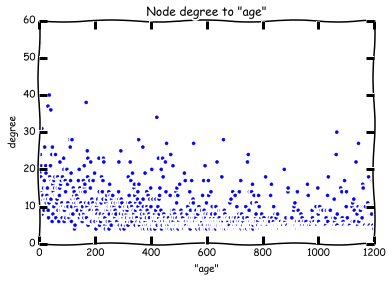

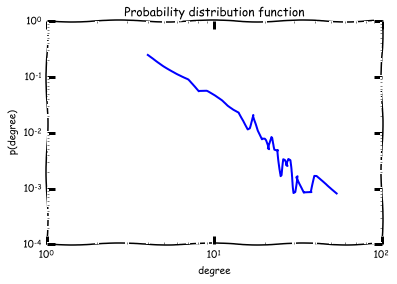

In [55]:
def random_subsample(prob, m):
    list_values = []
    #print(prob)
    for value, freq in prob.iteritems():
        for i in xrange(freq):
            list_values.append(value)
            
    subsample = []
    for i in xrange(m):
        ind = rnd.sample(list_values, 1)[0]
        subsample.append(ind)
        while True:
            try:
                list_values.remove(ind)
            except:
                break
    return subsample

#оconstants
n_0 = 50
m_0 = 200
n_max = 1200
m = 4
h = 100

#creating initial random graph
G = nx.gnm_random_graph(n_max, m_0)

#adding vertices to the graph according to model B
for node in xrange(n_max):
    prob = G.degree()
    prob.pop(node)
    #for k_a, v_a in prob.iteritems():
        #print(k_a, k_v)
    #print(prob)
    edges = [(node, neighbour) for neighbour in random_subsample(prob, m)]
    G.add_edges_from(edges)

plt.figure(1)
nx.draw_networkx(G,node_size = 1,with_labels = False)
plt.title('Graph generated by model B')

#computing pdf and cdf functions 
#also computing distribution properties
degrees = G.degree().values()

mean_d = float(sum(degrees)) / n_max
var_d = float(sum([i*i for i in degrees])) / n_max - mean_d*mean_d

print 'mean: ', mean_d, 'var: ', var_d

pdf = {}
for d in degrees:
    try:
        pdf[d] += 1.0 / n_max
    except:
        pdf[d] = 1.0 / n_max
        
cdf = {}
temp = 0
for d in pdf.keys():
    temp += pdf[d]
    cdf[d] = temp
        
plt.figure(2)
plt.plot(pdf.keys(), pdf.values())
plt.title('Probability distribution function')
plt.ylabel('p(degree)')
plt.xlabel('degree')

plt.figure(3)
plt.plot(cdf.keys(), cdf.values())
plt.title('Cumulative distribution function')
plt.ylabel('F(degree)')
plt.xlabel('degree')

#plotting required dependencies

#computing dependence of clustering coefficient and path length
av_len_list = []
cl_coeff_list = []
for n in xrange(n_0+h, n_max+h, h):
    G_temp = nx.gnm_random_graph(n, m_0)

    for node in xrange(n):
        prob = G_temp.degree()
        prob.pop(node)
        edges = [(node, neighbour) for neighbour in random_subsample(prob, m)]
        G_temp.add_edges_from(edges)
    
    av_len_list.append(nx.average_shortest_path_length(G_temp))
    cl_coeff_list.append(nx.transitivity(G_temp))

degree_to_age = G.degree().values()

plt.figure(4)
plt.plot(xrange(n_0+h, n_max+h, h), av_len_list)
plt.title('Average path length')
plt.ylabel('length')
plt.xlabel('num vertices')

plt.figure(5)
plt.plot(xrange(n_0+h, n_max+h, h), cl_coeff_list)
plt.title('Average clustering coefficient')
plt.ylabel('value')
plt.xlabel('num vertices')

plt.figure(6)
plt.plot(xrange(n_max), degree_to_age, '.')
plt.title('Node degree to "age"')
plt.ylabel('degree')
plt.xlabel('"age"')

#test on scale-free property
plt.figure(7)
plt.loglog(pdf.keys(), pdf.values())
plt.title('Probability distribution function')
plt.ylabel('p(degree)')
plt.xlabel('degree')

### <hr /> Task 2

Consider the following  "Vertex copying model" of growing network.

At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that  every edge of the  vertex
* is copied with probability $q$
* is rewired to any other randomly selected vertex with probability $1-q$


Starting state is defined by some small number of randomly connected vertices.

The model can generate both directed and undirected networks.

1. Generate  graphs based on the model ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
    
Analyse results with respect to various parameter settings

### Solution

1. Generated network is represented on the first figure ($n_0=50, m_0=200, n_{max}=1200, q=0.5$)
2. PDF/CDF functions are illustrated on the figures 2 and 3 respectively. Distribution characteristics:
$$MEAN\{degree\} = 183.45, VAR\{degree\} = 359$$
PDF function is similar to Gaussian.
3. The required dependencies are illustrated on the figures 4, 5 and 6:
    * Average path length decreases with number of vertices. It converges approximately to 1.85.
    * Average clustering coefficient decreases with number of vertices and converges to 0.155. 
    * Dependence between "age" of node and its degree is absent.

mean:  183.458333333 var:  359.139930556


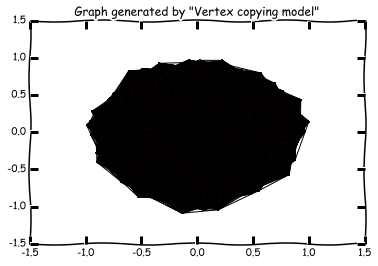

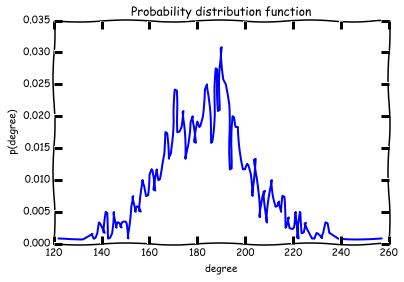

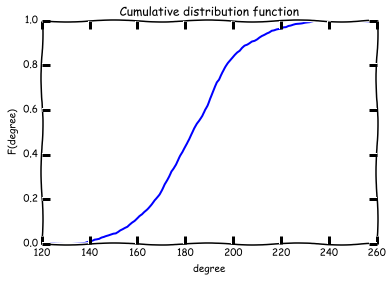

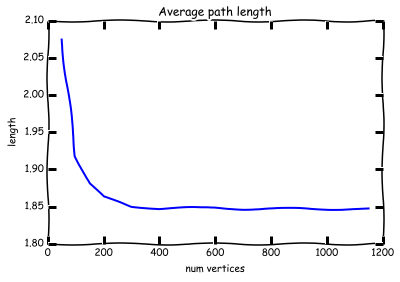

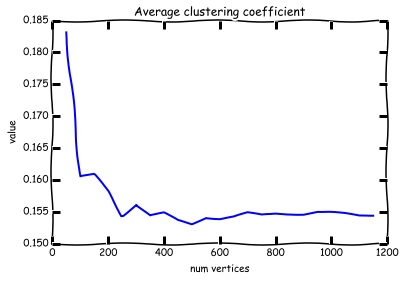

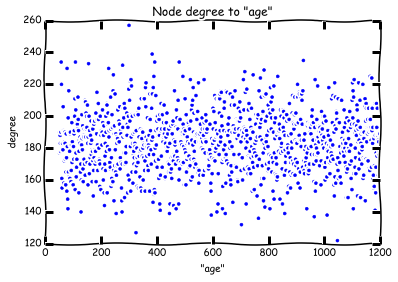

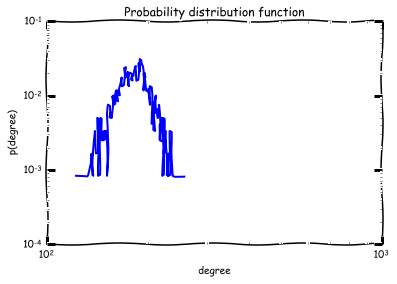

In [58]:
#constants
n_0 = 50
m_0 = 200
n_max = 1200
q = 0.5
h = 50 # step of the graph size for checking out average path length and clustering coefficient

#creating initial random graph
G = nx.gnm_random_graph(n_0, m_0)
#nx.draw_networkx(G,node_size = 1,with_labels = True)
#print(G.nodes())

#adding vertices to the graph according to model A 
#also computing dependencies during graph growth
av_len_list = []
cl_coeff_list = []
for node in xrange(n_0, n_max):
    copy_node = rnd.randint(0, node-1)
    list_neighbors = G.neighbors(copy_node)
    list_all_vertices = list(xrange(node))
    num_res = 0
    for neighbor in list_neighbors:
        list_all_vertices.remove(neighbor)
        if rnd.random() < q:
            G.add_edge(node, neighbor)
        else:
            num_res += 1
    edges = [(node, neighbour) for neighbour in rnd.sample(list_all_vertices, num_res)]
    G.add_edges_from(edges)
    if node % h == 0:
        av_len_list.append(nx.average_shortest_path_length(G))
        cl_coeff_list.append(nx.transitivity(G))

plt.figure(1)
nx.draw_networkx(G,node_size = 1,with_labels = False)
plt.title('Graph generated by "Vertex copying model"')

#computing pdf and cdf functions 
#also computing distribution properties
degrees = G.degree().values()

mean_d = float(sum(degrees)) / n_max
var_d = float(sum([i*i for i in degrees])) / n_max - mean_d*mean_d

print 'mean: ', mean_d, 'var: ', var_d

pdf = {}
for d in degrees:
    try:
        pdf[d] += 1.0 / n_max
    except:
        pdf[d] = 1.0 / n_max
        
cdf = {}
temp = 0
for d in pdf.keys():
    temp += pdf[d]
    cdf[d] = temp
        
plt.figure(2)
plt.plot(pdf.keys(), pdf.values())
plt.title('Probability distribution function')
plt.ylabel('p(degree)')
plt.xlabel('degree')

plt.figure(3)
plt.plot(cdf.keys(), cdf.values())
plt.title('Cumulative distribution function')
plt.ylabel('F(degree)')
plt.xlabel('degree')

#plotting required dependencies
degree_to_age = [degrees[i] for i in xrange(n_0, n_max)]

plt.figure(4)
plt.plot(xrange(n_0, n_max, h), av_len_list)
plt.title('Average path length')
plt.ylabel('length')
plt.xlabel('num vertices')

plt.figure(5)
plt.plot(xrange(n_0, n_max, h), cl_coeff_list)
plt.title('Average clustering coefficient')
plt.ylabel('value')
plt.xlabel('num vertices')

plt.figure(6)
plt.plot(xrange(n_0, n_max), degree_to_age, '.')
plt.title('Node degree to "age"')
plt.ylabel('degree')
plt.xlabel('"age"')

#test on scale-free property
plt.figure(7)
plt.loglog(pdf.keys(), pdf.values())
plt.title('Probability distribution function')
plt.ylabel('p(degree)')
plt.xlabel('degree')